In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/codsoft/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
label = ["RowNumber",'CustomerId','Surname']
dataset = dataset.drop (label,axis=1)

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
lbl = LabelEncoder()
dataset['Geography'] = lbl.fit_transform(dataset['Geography'])
dataset['Gender'] = lbl.fit_transform(dataset['Gender'])

In [ ]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


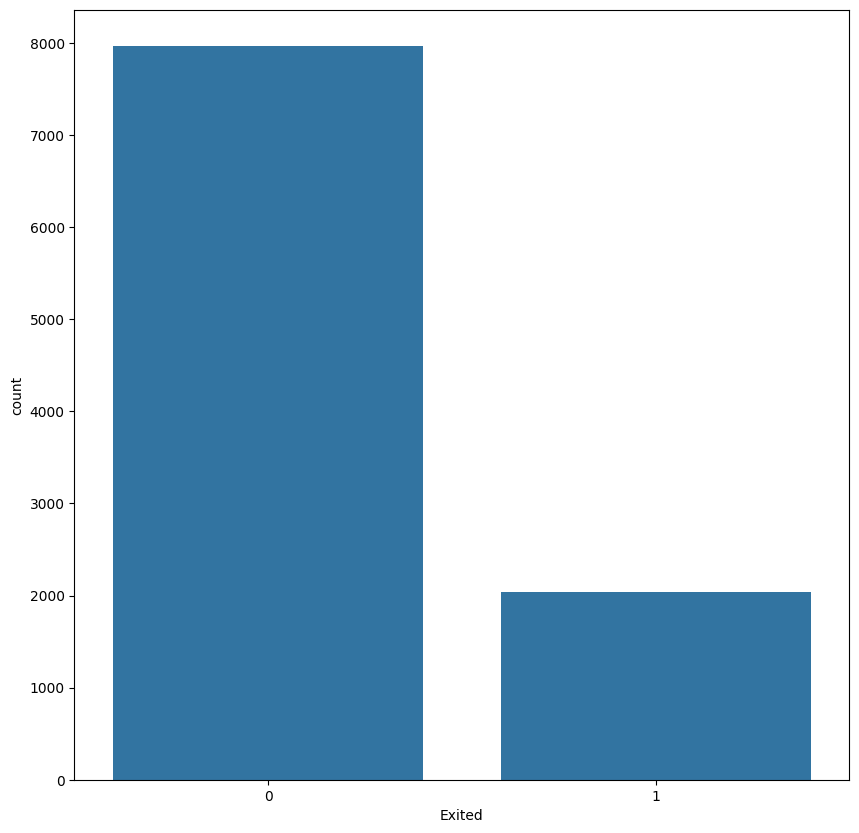

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Exited',data=dataset)
plt.show()

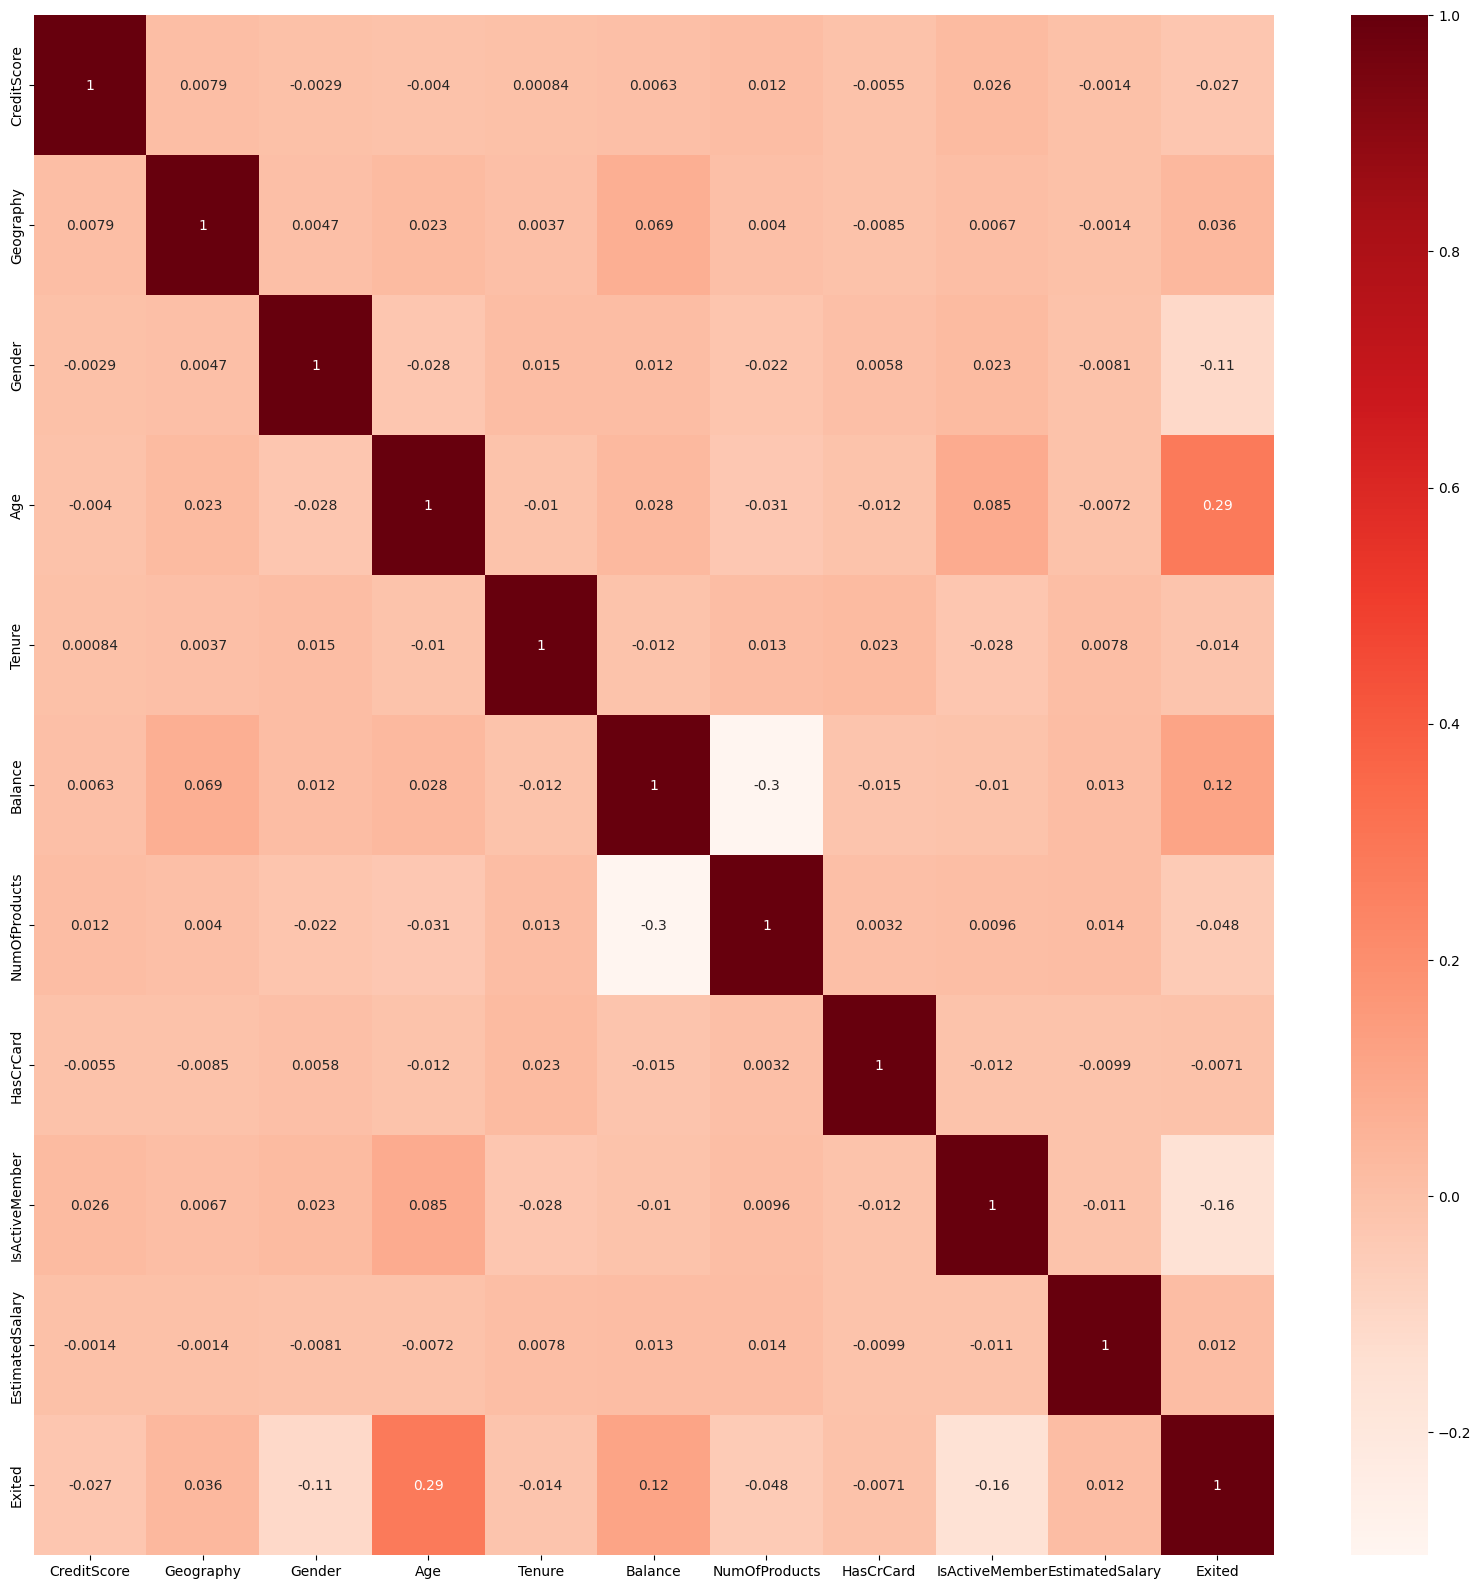

In [ ]:
corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap="Reds")
plt.show()

In [ ]:
x = dataset.drop(labels=['Exited'],axis=1)
y = dataset['Exited']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split (x,y,test_size=0.2,random_state=42)

In [ ]:
std = StandardScaler()

In [ ]:
xtrain = std.fit_transform(xtrain)
xtest = std.transform(xtest)

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=500)

In [ ]:
ypreds = rf.predict(xtest)
ypreds

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(accuracy_score(ytest,ypreds))

0.8665


In [ ]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
cm = confusion_matrix(ytest,ypreds)
cm

array([[1553,   54],
       [ 213,  180]])

<Axes: >

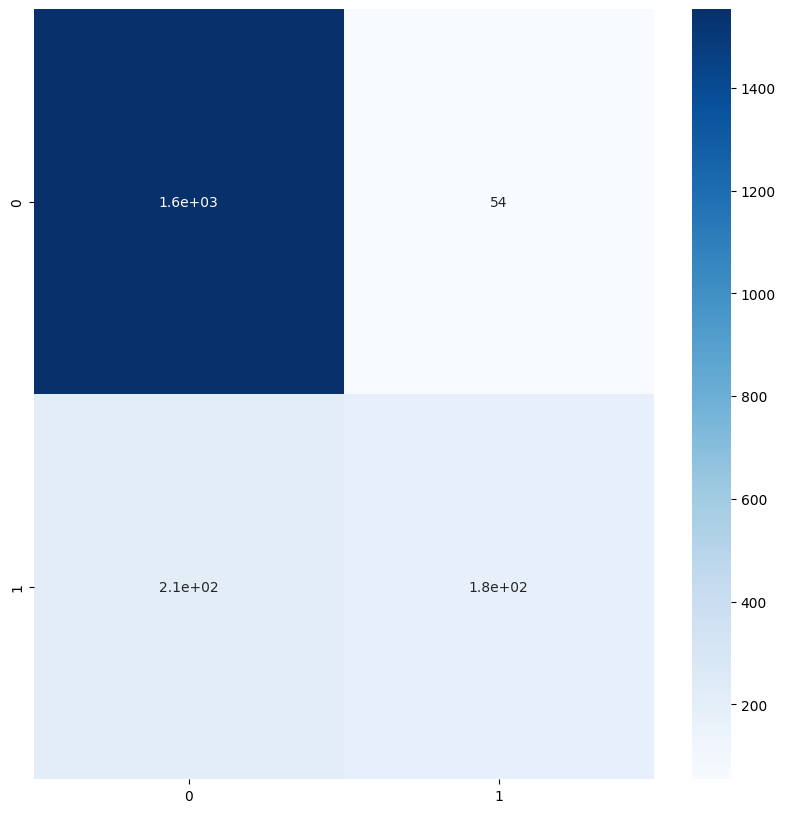

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="Blues")

In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1000)
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

In [ ]:
predictions = gbm.predict(xtest)
predictions[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
print(accuracy_score(ytest,ypreds))

0.8665


In [ ]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [ ]:
c = confusion_matrix(ytest,ypreds)
c

array([[1553,   54],
       [ 213,  180]])

<Axes: >

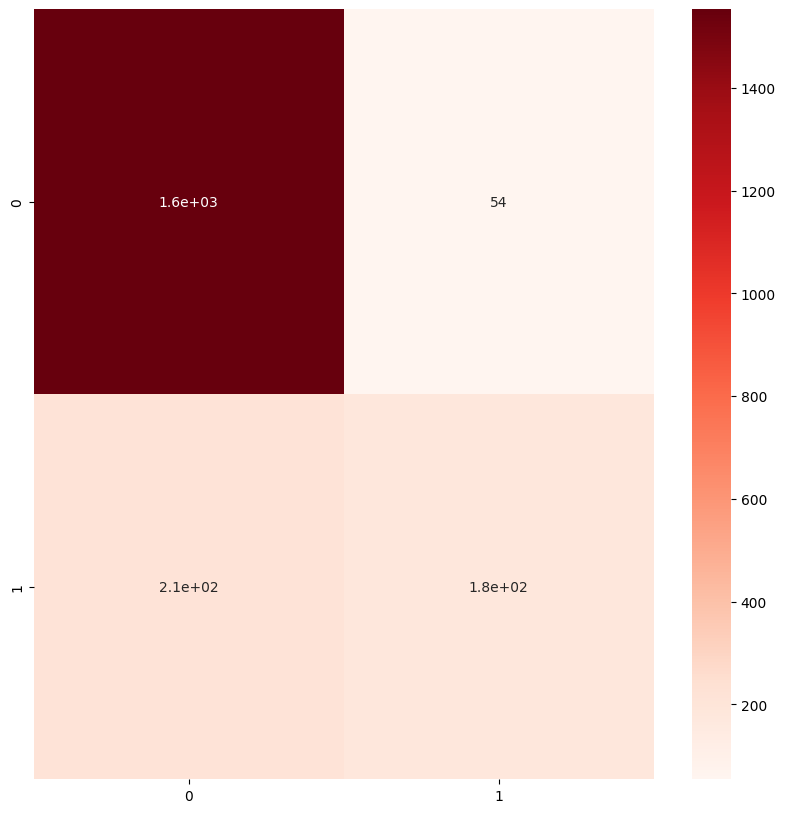

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True,cmap="Reds")